In [1]:
import json
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
from datetime import date

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns

# Linear Regression to verify implementation
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

# Scipy for statistics
import scipy

# PyMC3 for Bayesian Inference
import pymc3 as pm

%matplotlib inline

## 1. Populate Dataframes

In [2]:
# read from csv files
 
topicsDF = pd.read_csv(r'topics.csv',encoding='latin-1')

wf_twitterDF = pd.read_csv(r'twitter_wf_textblob - manual_update.csv',encoding='latin-1')
sap_twitterDF = pd.read_csv(r'twitter_sap_textblob - manual_update.csv',encoding='latin-1')

In [3]:
# Total number for each company
print("WF Tweets: "+ str(wf_twitterDF.size))

print("SAP Tweets: "+ str(sap_twitterDF.size))

WF Tweets: 11388
SAP Tweets: 13624


In [4]:
wf_twitterDF['sourceDate'] = wf_twitterDF['sourceDate'].astype('datetime64[ns]') 

In [5]:
wf_twitterDF.reset_index(drop=True)
wf_twitterDF.set_index('sourceDate')


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,text,URL,createdTimestamp,quoteCount,replyCount,retweetCount,...,lang,isRelated,source,NP,isInReplyTo,user_id,vader_compound,vader_sentiment,tb_polarity,tb_sentiment
sourceDate,,,,,,,,,,,,,,,,,,,,,
2019-09-29,213,255,255,5dae74f611bb5a25b06906f2,The Board of \nhas TOTALLY lost it.\nNew CEO w...,https://t.co/gqW2h4NW9T,9/29/2019 17:17,0,0,0,...,en,Y,WF,N,0,2.135718e+07,-0.7663,N,-0.128409,E
2019-09-28,154,189,189,5dae74ce11bb5a25b06906b0,Wells Fargo new CEO is just as Evil as the las...,NaN,9/28/2019 16:10,0,0,0,...,en,Y,WF,N,0,1.853485e+07,-0.6776,N,-0.287879,E
2019-09-27,45,49,49,5dab73cd11bb5a1f6c86dfee,Wells Fargo names outsider as new CEO three ye...,https://t.co/TZWr8e5raO,9/27/2019 22:35,0,0,0,...,en,Y,WF,NaN,0,1.125933e+08,-0.6124,N,-0.181818,E
2019-09-27,0,0,0,5dab73ca11bb5a1f6c86dfbd,Wells Fargo names outsider as new CEO three ye...,https://t.co/WBtIAtX8Gf,9/27/2019 23:51,2,0,0,...,en,Y,WF,NaN,0,4.867858e+09,-0.6124,N,-0.181818,E
2019-09-28,175,211,211,5dae74d011bb5a25b06906c6,Wells Fargo names outsider as new CEO three ye...,https://t.co/VOnrw8hF8R,9/28/2019 14:20,0,0,0,...,en,Y,WF,NaN,0,3.067629e+08,-0.6124,N,-0.181818,E
2019-10-01,360,426,426,5dae756511bb5a25b069079d,So Wells Fargo chose a rent-a-ceo rather than ...,https://t.co/awCUgOdz2G,10/1/2019 21:30,0,0,0,...,en,Y,WF,N,0,9.490000e+17,-0.5434,N,0.000000,E
2019-09-30,291,348,348,5dae751911bb5a25b069074f,WELLS FARGO NOMBRA NUEVO CEO PARA ENMENDAR CRI...,NaN,9/30/2019 18:48,0,0,0,...,es,Y,WF,NaN,0,3.724730e+08,-0.4767,E,0.000000,E
2019-10-01,396,474,474,5dae756811bb5a25b06907cd,WELLS FARGO NOMBRA NUEVO CEO PARA ENMENDAR CRI...,NaN,10/1/2019 10:49,0,0,0,...,es,Y,WF,NaN,0,4.277073e+09,-0.4767,E,0.000000,E
2019-10-01,413,491,491,5dae756a11bb5a25b06907de,WELLS FARGO NOMBRA NUEVO CEO PARA ENMENDAR CRI...,NaN,10/1/2019 1:30,0,0,0,...,es,Y,WF,NaN,0,3.229112e+09,-0.4767,E,0.000000,E


In [6]:
sap_twitterDF['sourceDate'] = sap_twitterDF['sourceDate'].astype('datetime64[ns]') 

In [7]:
sap_twitterDF.reset_index(drop=True)
sap_twitterDF.set_index('sourceDate')

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,text,URL,createdTimestamp,quoteCount,replyCount,retweetCount,...,lang,isRelated,source,NP,isInReplyTo,user_id,vader_compound,vader_sentiment,tb_polarity,tb_sentiment
sourceDate,,,,,,,,,,,,,,,,,,,,,
2019-10-09,0,619,619,5dae77e811bb5a25b069085e,"Experience Management: ""Start with empathy for...",NaN,2019-10-09 18:10:03,0,0,0,...,en,Y,SAP,NaN,0.0,2.593419e+08,0.0000,E,0.000000,E
2019-10-09,1,621,621,5dae77e811bb5a25b0690860,"Experience Management: ""Start with empathy for...",https://t.co/t0MxMZ5DxI,2019-10-09 18:00:01,0,0,2,...,en,Y,SAP,NaN,0.0,3.266873e+08,0.0000,E,0.000000,E
2019-10-09,2,633,633,5dae77e911bb5a25b069086c,SAP CEO has made clear: the new economy is he...,https://t.co/tqPgEZix2U,2019-10-09 14:36:00,0,0,0,...,en,Y,SAP,NaN,0.0,1.105129e+08,0.1027,E,0.078788,E
2019-10-09,3,643,643,5dae77e911bb5a25b0690876,Thanks for hosting Bill Mcdermott CEO of SAP ...,NaN,2019-10-09 05:21:42,0,0,0,...,en,Y,SAP,NaN,0.0,1.024890e+18,0.7184,P,0.200000,E
2019-10-10,4,645,645,5dae784011bb5a25b0690878,"New article: ""SAP CEO Bill McDermott stepping ...",https://t.co/DoQvIY7sVy,2019-10-10 23:58:48,0,0,0,...,en,Y,SAP,NaN,0.0,7.297547e+17,0.0000,E,-0.006397,E
2019-10-10,5,646,646,5dae784011bb5a25b0690879,Breaking News: CEO Bill McDermott Resigns; Mo...,https://t.co/9hqI0mTsGm,2019-10-10 23:58:38,0,0,5,...,en,Y,SAP,NaN,0.0,1.463898e+07,-0.3182,E,0.000000,E
2019-10-10,6,647,647,5dae784011bb5a25b069087a,Sad but happy to offer a sincere thank you to ...,https://t.co/tpOtGChF5q,2019-10-10 23:58:27,0,0,0,...,en,Y,SAP,P,0.0,3.951284e+09,0.8957,P,0.425000,E
2019-10-10,7,648,648,5dae784111bb5a25b069087b,SAP said CEO Bill McDermott wouldnÃÂ¢ÃÂÃÂ...,NaN,2019-10-10 23:58:19,0,0,0,...,en,Y,SAP,NaN,0.0,3.772019e+08,0.0000,E,0.000000,E
2019-10-10,8,649,649,5dae784111bb5a25b069087c,Bill McDermott steps down as SAPÃÂ¢ÃÂÃÂs ...,https://t.co/herfof3ldl,2019-10-10 23:58:13,0,0,0,...,en,Y,SAP,NaN,0.0,2.708690e+08,0.0000,E,-0.155556,E


In [8]:
# Weight the vader compound and tb_polarity data by quote, reply and retweet count. 

wf_twitterDF['vader_weighted'] = wf_twitterDF.apply(lambda row: row.vader_compound * (1 + row.favoriteCount + row.quoteCount + row.replyCount + row.retweetCount), axis = 1) 
wf_twitterDF['tb_weighted'] = wf_twitterDF.apply(lambda row: row.tb_polarity * (1 + row.favoriteCount + row.quoteCount + row.replyCount + row.retweetCount), axis = 1) 


In [9]:

# Weight the vader compound and tb_polarity data by quote, reply and retweet count. 

sap_twitterDF['vader_weighted'] = sap_twitterDF.apply(lambda row: row.vader_compound * (1 + row.favoriteCount + row.quoteCount + row.replyCount + row.retweetCount), axis = 1) 
sap_twitterDF['tb_weighted'] = sap_twitterDF.apply(lambda row: row.tb_polarity * (1 + row.favoriteCount + row.quoteCount + row.replyCount + row.retweetCount), axis = 1) 

### 1.5 Bootstrap data - 1000 samples per day

In [10]:
def bootstrap_replicate(data, num_samples, rand_state):
    return resample(data, replace=True, n_samples=num_samples, random_state=rand_state)

number_of_samples =500
rand_state=5

# WF

source_date = '2019-09-25'
wf_vader_0925 = bootstrap_replicate(wf_twitterDF[wf_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

source_date = '2019-09-26'
wf_vader_0926 = bootstrap_replicate(wf_twitterDF[wf_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

source_date = '2019-09-27'
wf_vader_0927 = bootstrap_replicate(wf_twitterDF[wf_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

source_date = '2019-09-28'
wf_vader_0928 = bootstrap_replicate(wf_twitterDF[wf_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

source_date = '2019-09-29'
wf_vader_0929 = bootstrap_replicate(wf_twitterDF[wf_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

source_date = '2019-09-30'
wf_vader_0930 = bootstrap_replicate(wf_twitterDF[wf_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

source_date = '2019-10-01'
wf_vader_1001 = bootstrap_replicate(wf_twitterDF[wf_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

source_date = '2019-10-02'
wf_vader_1002 = bootstrap_replicate(wf_twitterDF[wf_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

wf_t_master_df= pd.concat([wf_vader_0925, wf_vader_0926, wf_vader_0927, wf_vader_0928, wf_vader_0929, wf_vader_0930, wf_vader_1001, wf_vader_1002], ignore_index=True)

In [11]:
wf_t_master_df.reset_index(drop=True)
wf_t_master_df.set_index('sourceDate') 

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,text,URL,createdTimestamp,quoteCount,replyCount,retweetCount,...,source,NP,isInReplyTo,user_id,vader_compound,vader_sentiment,tb_polarity,tb_sentiment,vader_weighted,tb_weighted
sourceDate,,,,,,,,,,,,,,,,,,,,,
2019-09-25,95,109,109,5dae743a11bb5a25b0690660,What if the CEO is the Kobe Bryant of the ind...,https://t.co/t47xhDU0i4,9/25/2019 1:24,0,0,0,...,WF,N,1,3.108174e+08,-0.1027,E,0.250000,E,-0.1027,0.250000
2019-09-25,95,109,109,5dae743a11bb5a25b0690660,What if the CEO is the Kobe Bryant of the ind...,https://t.co/t47xhDU0i4,9/25/2019 1:24,0,0,0,...,WF,N,1,3.108174e+08,-0.1027,E,0.250000,E,-0.1027,0.250000
2019-09-25,95,109,109,5dae743a11bb5a25b0690660,What if the CEO is the Kobe Bryant of the ind...,https://t.co/t47xhDU0i4,9/25/2019 1:24,0,0,0,...,WF,N,1,3.108174e+08,-0.1027,E,0.250000,E,-0.1027,0.250000
2019-09-25,95,109,109,5dae743a11bb5a25b0690660,What if the CEO is the Kobe Bryant of the ind...,https://t.co/t47xhDU0i4,9/25/2019 1:24,0,0,0,...,WF,N,1,3.108174e+08,-0.1027,E,0.250000,E,-0.1027,0.250000
2019-09-25,95,109,109,5dae743a11bb5a25b0690660,What if the CEO is the Kobe Bryant of the ind...,https://t.co/t47xhDU0i4,9/25/2019 1:24,0,0,0,...,WF,N,1,3.108174e+08,-0.1027,E,0.250000,E,-0.1027,0.250000
2019-09-25,95,109,109,5dae743a11bb5a25b0690660,What if the CEO is the Kobe Bryant of the ind...,https://t.co/t47xhDU0i4,9/25/2019 1:24,0,0,0,...,WF,N,1,3.108174e+08,-0.1027,E,0.250000,E,-0.1027,0.250000
2019-09-25,95,109,109,5dae743a11bb5a25b0690660,What if the CEO is the Kobe Bryant of the ind...,https://t.co/t47xhDU0i4,9/25/2019 1:24,0,0,0,...,WF,N,1,3.108174e+08,-0.1027,E,0.250000,E,-0.1027,0.250000
2019-09-25,95,109,109,5dae743a11bb5a25b0690660,What if the CEO is the Kobe Bryant of the ind...,https://t.co/t47xhDU0i4,9/25/2019 1:24,0,0,0,...,WF,N,1,3.108174e+08,-0.1027,E,0.250000,E,-0.1027,0.250000
2019-09-25,95,109,109,5dae743a11bb5a25b0690660,What if the CEO is the Kobe Bryant of the ind...,https://t.co/t47xhDU0i4,9/25/2019 1:24,0,0,0,...,WF,N,1,3.108174e+08,-0.1027,E,0.250000,E,-0.1027,0.250000


In [12]:
# SAP
# 10/09/19 - 10/16/19

source_date = '2019-10-09'
sap_vader_1009 = bootstrap_replicate(sap_twitterDF[sap_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

source_date = '2019-10-10'
sap_vader_1010 = bootstrap_replicate(sap_twitterDF[sap_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

source_date = '2019-10-11'
sap_vader_1011 = bootstrap_replicate(sap_twitterDF[sap_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

source_date = '2019-10-12'
sap_vader_1012 = bootstrap_replicate(sap_twitterDF[sap_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

source_date = '2019-10-13'
sap_vader_1013 = bootstrap_replicate(sap_twitterDF[sap_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

source_date = '2019-10-14'
sap_vader_1014 = bootstrap_replicate(sap_twitterDF[sap_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

source_date = '2019-10-15'
sap_vader_1015 = bootstrap_replicate(sap_twitterDF[sap_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

source_date = '2019-10-16'
sap_vader_1016 = bootstrap_replicate(sap_twitterDF[sap_twitterDF['sourceDate'].dt.date.astype(str) == source_date], number_of_samples, rand_state)

sap_t_master_df= pd.concat([sap_vader_1009, sap_vader_1010, sap_vader_1011, sap_vader_1012, sap_vader_1013, sap_vader_1014, sap_vader_1015, sap_vader_1016], ignore_index=True)

In [13]:
sap_t_master_df.reset_index(drop=True)
sap_t_master_df.set_index('sourceDate') 

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,text,URL,createdTimestamp,quoteCount,replyCount,retweetCount,...,source,NP,isInReplyTo,user_id,vader_compound,vader_sentiment,tb_polarity,tb_sentiment,vader_weighted,tb_weighted
sourceDate,,,,,,,,,,,,,,,,,,,,,
2019-10-09,3,643,643,5dae77e911bb5a25b0690876,Thanks for hosting Bill Mcdermott CEO of SAP ...,NaN,2019-10-09 05:21:42,0,0,0,...,SAP,NaN,0.0,1.024890e+18,0.7184,P,0.200000,E,1.4368,0.400000
2019-10-09,2,633,633,5dae77e911bb5a25b069086c,SAP CEO has made clear: the new economy is he...,https://t.co/tqPgEZix2U,2019-10-09 14:36:00,0,0,0,...,SAP,NaN,0.0,1.105129e+08,0.1027,E,0.078788,E,0.1027,0.078788
2019-10-09,3,643,643,5dae77e911bb5a25b0690876,Thanks for hosting Bill Mcdermott CEO of SAP ...,NaN,2019-10-09 05:21:42,0,0,0,...,SAP,NaN,0.0,1.024890e+18,0.7184,P,0.200000,E,1.4368,0.400000
2019-10-09,1,621,621,5dae77e811bb5a25b0690860,"Experience Management: ""Start with empathy for...",https://t.co/t0MxMZ5DxI,2019-10-09 18:00:01,0,0,2,...,SAP,NaN,0.0,3.266873e+08,0.0000,E,0.000000,E,0.0000,0.000000
2019-10-09,2,633,633,5dae77e911bb5a25b069086c,SAP CEO has made clear: the new economy is he...,https://t.co/tqPgEZix2U,2019-10-09 14:36:00,0,0,0,...,SAP,NaN,0.0,1.105129e+08,0.1027,E,0.078788,E,0.1027,0.078788
2019-10-09,2,633,633,5dae77e911bb5a25b069086c,SAP CEO has made clear: the new economy is he...,https://t.co/tqPgEZix2U,2019-10-09 14:36:00,0,0,0,...,SAP,NaN,0.0,1.105129e+08,0.1027,E,0.078788,E,0.1027,0.078788
2019-10-09,0,619,619,5dae77e811bb5a25b069085e,"Experience Management: ""Start with empathy for...",NaN,2019-10-09 18:10:03,0,0,0,...,SAP,NaN,0.0,2.593419e+08,0.0000,E,0.000000,E,0.0000,0.000000
2019-10-09,1,621,621,5dae77e811bb5a25b0690860,"Experience Management: ""Start with empathy for...",https://t.co/t0MxMZ5DxI,2019-10-09 18:00:01,0,0,2,...,SAP,NaN,0.0,3.266873e+08,0.0000,E,0.000000,E,0.0000,0.000000
2019-10-09,0,619,619,5dae77e811bb5a25b069085e,"Experience Management: ""Start with empathy for...",NaN,2019-10-09 18:10:03,0,0,0,...,SAP,NaN,0.0,2.593419e+08,0.0000,E,0.000000,E,0.0000,0.000000


## 4. WF - Compare between dates

### 4.1. Vader Compound

#### 4.1.1. Box plot - without resampling

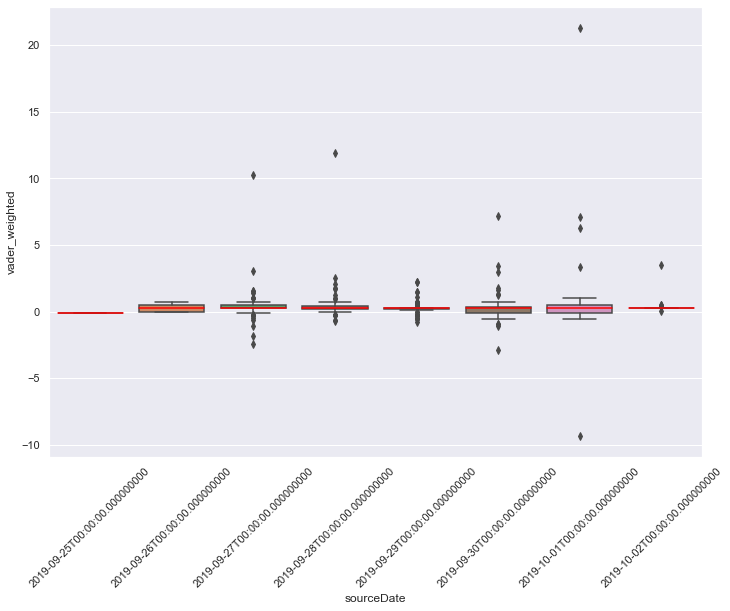

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Create box plot with Seaborn's default settings
g=sns.boxplot(x='sourceDate', y='vader_weighted', data=wf_twitterDF,  medianprops={'color':'red'}) #, showfliers=False)


# Label the axes
g=plt.xlabel('sourceDate')
g=plt.ylabel('vader_weighted')  

plt.xticks(rotation=45)
# Show the plot
plt.show()


C:\Users\yulmee\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


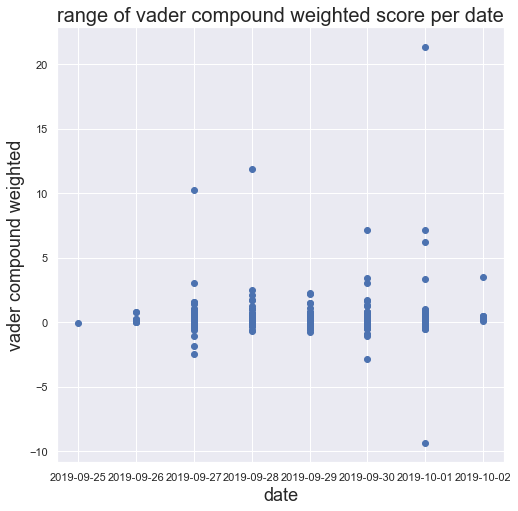

In [15]:
plt.figure(figsize=(8, 8))

plt.plot(wf_twitterDF['sourceDate'], wf_twitterDF['vader_weighted'], 'bo');
plt.xlabel('date', size = 18); plt.ylabel('vader compound weighted', size = 18); 
plt.title('range of vader compound weighted score per date', size = 20);

#### 4.1.2 *Ordinary Least squares linear regression - without resampling*

In [76]:
wf_twitterDF.vader_weighted.describe()

count    438.000000
mean       0.418664
std        1.539228
min       -9.339100
25%        0.208300
50%        0.250000
75%        0.493900
max       21.319400
Name: vader_weighted, dtype: float64

In [16]:
wf_twitterDF['Intercept'] = 1
# Create the features and response
X = wf_twitterDF.loc[:, ['Intercept', 'sourceDate']]
y = wf_twitterDF.loc[:, 'vader_weighted']

wf_announced_date = datetime(2019, 9, 27,0,0,0)  
X['Timestamp'] = X.apply(lambda row: (row.sourceDate - wf_announced_date).days, axis = 1) 

In [17]:
linear_regression = LinearRegression()
linear_regression.fit(np.array(X.Timestamp).reshape(-1,1),y)
y_pred = linear_regression.predict(X.Timestamp.values.astype(float).reshape(-1,1))
# df.time.values.astype(float).reshape(-1, 1)
print('Intercept from library:', linear_regression.intercept_)
print('Slope from library:', linear_regression.coef_[0])
wf_vader_intercept = linear_regression.intercept_
wf_vader_slope =  linear_regression.coef_[0]
# Notes: see 
# 1. https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# 2. https://stackoverflow.com/questions/54352621/sklearn-linear-regression-with-date-data

Intercept from library: 0.3853949018663042
Slope from library: 0.01730645247334769


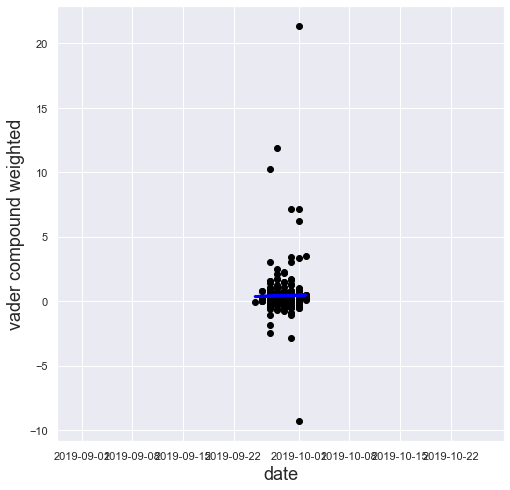

In [18]:
plt.figure(figsize=(8, 8)) 
plt.scatter(X.sourceDate, y,  color='black')
plt.plot(X.sourceDate, y_pred, color='blue', linewidth=3)
plt.xlabel('date', size = 18); plt.ylabel('vader compound weighted', size = 18); 
#plt.xticks(())
#plt.yticks(())

plt.show()

#### 4.1.3. Bayesian Linear regression - without resampling

In [19]:
# Using all observations (use mu=0.14 and sd=0.13 from dataframe statistics for vader compound score)

with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0.14, sd = 0.13)
    
    # Slope 
    slope = pm.Normal('slope', mu = 0.14, sd = 0.13)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 0.13)
    
    # Estimate of mean
    mean = intercept + slope * X.loc[:, 'Timestamp']
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y.values)
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(1000, step)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, slope, Intercept]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 3000/3000 [00:04<00:00, 620.43draws/s]


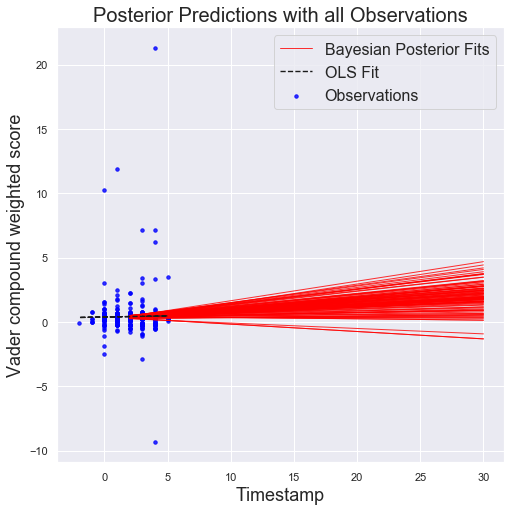

In [20]:
plt.figure(figsize = (8, 8))
pm.plot_posterior_predictive_glm(linear_trace, samples = 100, eval=np.linspace(2, 30, 100), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['Intercept'] + sample['slope'] * x);
plt.scatter(X['Timestamp'], y.values, s = 12, alpha = 0.8, c = 'blue', label = 'Observations')
plt.plot(X['Timestamp'], wf_vader_intercept + X['Timestamp'] * wf_vader_slope, 'k--', label = 'OLS Fit', linewidth = 1.4)
plt.title('Posterior Predictions with all Observations', size = 20); plt.xlabel('Timestamp', size = 18);
plt.ylabel('Vader compound weighted score', size = 18);
plt.legend(prop={'size': 16});

### 4.1.4 Ordinary Least squares linear regression - with resampling

In [58]:
wf_t_master_df.vader_weighted.describe()

count    4000.000000
mean        0.338293
std         1.448263
min        -9.339100
25%        -0.077400
50%         0.250000
75%         0.309950
max        21.319400
Name: vader_weighted, dtype: float64

Box plot with resampling

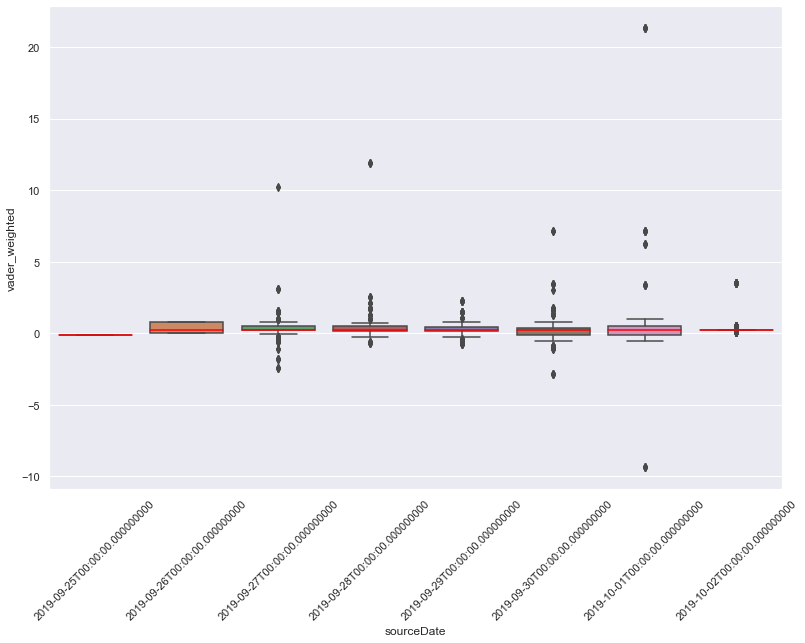

In [74]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Create box plot with Seaborn's default settings
g=sns.boxplot(x='sourceDate', y='vader_weighted', data=wf_t_master_df,  medianprops={'color':'red'}) #, showfliers=False)


# Label the axes
g=plt.xlabel('sourceDate')
g=plt.ylabel('vader_weighted')  

plt.xticks(rotation=45)
# Show the plot
plt.show()

In [75]:
wf_t_master_df.groupby('sourceDate')['vader_weighted'].mean()

sourceDate
2019-09-25   -0.102700
2019-09-26    0.287000
2019-09-27    0.352986
2019-09-28    0.473979
2019-09-29    0.279017
2019-09-30    0.291256
2019-10-01    0.714075
2019-10-02    0.410732
Name: vader_weighted, dtype: float64

Intercept from library: 0.24277086428571423
Slope from library: 0.0636815071428572


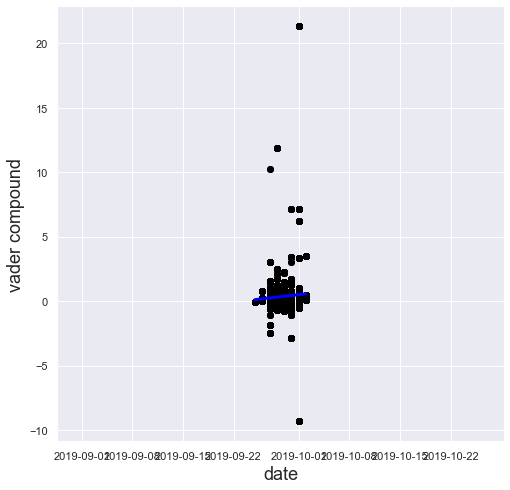

In [59]:
wf_t_master_df['Intercept'] = 1
# Create the features and response
X = wf_t_master_df.loc[:, ['Intercept', 'sourceDate']]
y = wf_t_master_df.loc[:, 'vader_weighted']

wf_announced_date = datetime(2019, 9, 27,0,0,0)  
X['Timestamp'] = X.apply(lambda row: (row.sourceDate - wf_announced_date).days, axis = 1) 

linear_regression = LinearRegression()
linear_regression.fit(np.array(X.Timestamp).reshape(-1,1),y)
y_pred = linear_regression.predict(X.Timestamp.values.astype(float).reshape(-1,1))
# df.time.values.astype(float).reshape(-1, 1)
print('Intercept from library:', linear_regression.intercept_)
print('Slope from library:', linear_regression.coef_[0])
wf_vader_intercept = linear_regression.intercept_
wf_vader_slope =  linear_regression.coef_[0]
# Notes: see 
# 1. https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# 2. https://stackoverflow.com/questions/54352621/sklearn-linear-regression-with-date-data

plt.figure(figsize=(8, 8)) 
plt.scatter(X.sourceDate, y,  color='black')
plt.plot(X.sourceDate, y_pred, color='blue', linewidth=3)
plt.xlabel('date', size = 18); plt.ylabel('vader compound', size = 18); 
#plt.xticks(())
#plt.yticks(())

plt.show()

#### 4.1.5. Bayesian Linear regression - with resampling

In [60]:
# Using all observations (use mu=0.34 and sd=1.45 from dataframe statistics for vader compound score)

with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0.34, sd = 1.45)
    
    # Slope 
    slope = pm.Normal('slope', mu = 0.34, sd = 1.45)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 1.45)
    
    # Estimate of mean
    mean = intercept + slope * X.loc[:, 'Timestamp']
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y.values)
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(1000, step)


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, slope, Intercept]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 3000/3000 [00:04<00:00, 616.20draws/s]


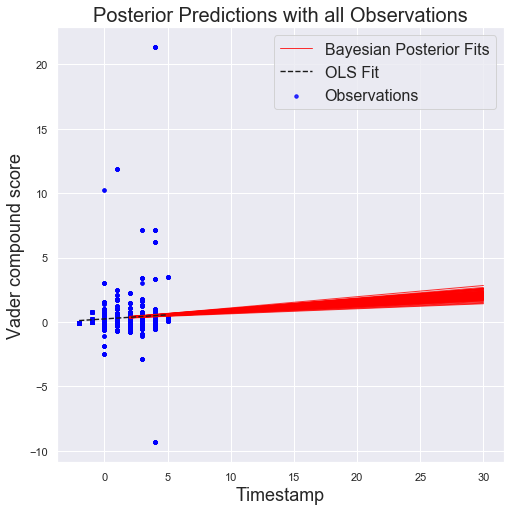

In [61]:
plt.figure(figsize = (8, 8))
pm.plot_posterior_predictive_glm(linear_trace, samples = 100, eval=np.linspace(2, 30, 100), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['Intercept'] + sample['slope'] * x);
plt.scatter(X['Timestamp'], y.values, s = 12, alpha = 0.8, c = 'blue', label = 'Observations')
plt.plot(X['Timestamp'], wf_vader_intercept + X['Timestamp'] * wf_vader_slope, 'k--', label = 'OLS Fit', linewidth = 1.4)
plt.title('Posterior Predictions with all Observations', size = 20); plt.xlabel('Timestamp', size = 18);
plt.ylabel('Vader compound score', size = 18);
plt.legend(prop={'size': 16});

In [62]:
# predict 10/3 
timestamp_10_3 =6 
wf_bayes_prediction_v = linear_trace['Intercept'] + linear_trace['slope'] * timestamp_10_3 


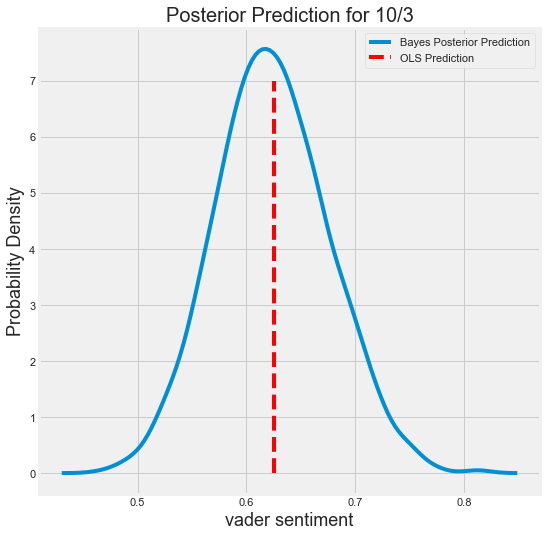

In [80]:
plt.figure(figsize = (8, 8))
plt.style.use('fivethirtyeight')
sns.kdeplot(wf_bayes_prediction_v, label = 'Bayes Posterior Prediction')
plt.vlines(x = wf_vader_intercept + wf_vader_slope * timestamp_10_3, 
           ymin = 0, ymax = 7, 
           label = 'OLS Prediction',
          colors = 'red', linestyles='--')
plt.legend();
plt.xlabel('vader sentiment', size = 18), plt.ylabel('Probability Density', size = 18);
plt.title('Posterior Prediction for 10/3', size = 20);

### 4.2. TB Polarity

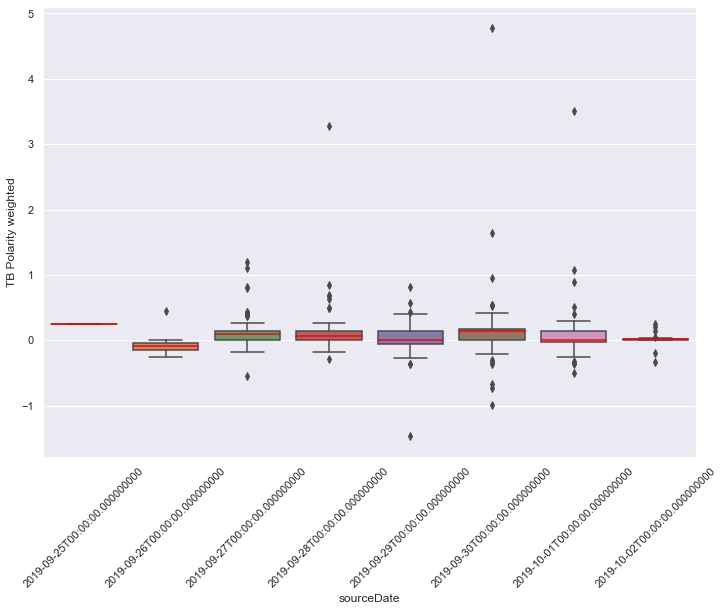

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Create box plot with Seaborn's default settings
g=sns.boxplot(x='sourceDate', y='tb_weighted', data=wf_twitterDF,  medianprops={'color':'red'}) #, showfliers=False)


# Label the axes
g=plt.xlabel('sourceDate')
g=plt.ylabel('TB Polarity weighted')  

plt.xticks(rotation=45)
# Show the plot
plt.show()


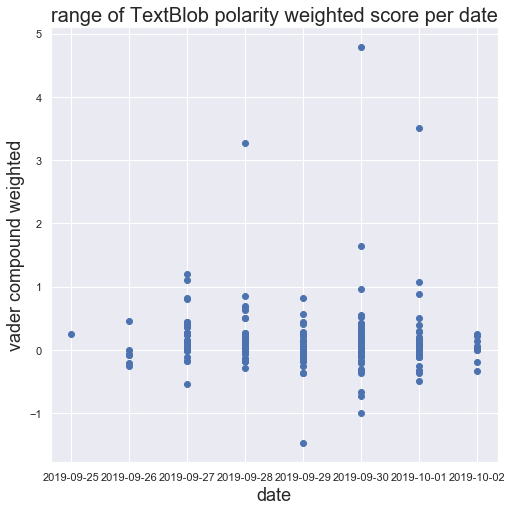

In [26]:
plt.figure(figsize=(8, 8))

plt.plot(wf_twitterDF['sourceDate'], wf_twitterDF['tb_weighted'], 'bo');
plt.xlabel('date', size = 18); plt.ylabel('vader compound weighted', size = 18); 
plt.title('range of TextBlob polarity weighted score per date', size = 20);

In [81]:
wf_t_master_df.groupby('sourceDate')['tb_weighted'].mean()

sourceDate
2019-09-25    0.250000
2019-09-26   -0.033183
2019-09-27    0.129092
2019-09-28    0.122903
2019-09-29    0.030155
2019-09-30    0.164056
2019-10-01    0.086725
2019-10-02    0.013619
Name: tb_weighted, dtype: float64

### 4.2.2 Ordinary Least squares linear regression - without resampling

In [27]:
wf_twitterDF['Intercept'] = 1
# Create the features and response
X = wf_twitterDF.loc[:, ['Intercept', 'sourceDate']]
y = wf_twitterDF.loc[:, 'tb_weighted']

wf_announced_date = datetime(2019, 9, 27,0,0,0)  
X['Timestamp'] = X.apply(lambda row: (row.sourceDate - wf_announced_date).days, axis = 1) 

linear_regression = LinearRegression()
linear_regression.fit(np.array(X.Timestamp).reshape(-1,1),y)
y_pred = linear_regression.predict(X.Timestamp.values.astype(float).reshape(-1,1))
# df.time.values.astype(float).reshape(-1, 1)
print('Intercept from library:', linear_regression.intercept_)
print('Slope from library:', linear_regression.coef_[0])
wf_tb_intercept = linear_regression.intercept_
wf_tb_slope =  linear_regression.coef_[0]
# Notes: see 
# 1. https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# 2. https://stackoverflow.com/questions/54352621/sklearn-linear-regression-with-date-data

Intercept from library: 0.11372146120567202
Slope from library: -0.003961248298199945


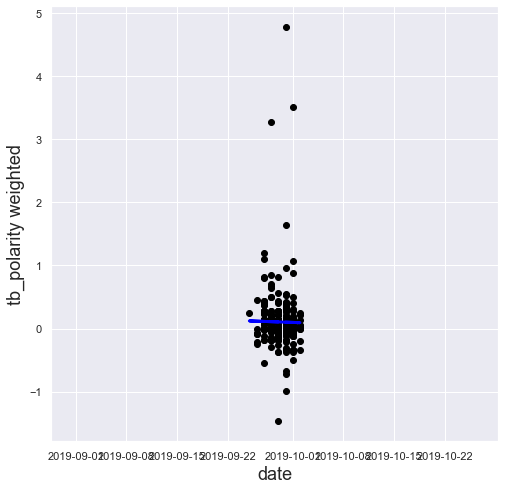

In [28]:
plt.figure(figsize=(8, 8)) 
plt.scatter(X.sourceDate, y,  color='black')
plt.plot(X.sourceDate, y_pred, color='blue', linewidth=3)
plt.xlabel('date', size = 18); plt.ylabel('tb_polarity weighted', size = 18); 
#plt.xticks(())
#plt.yticks(())

plt.show()

### 4.1.3. Bayesian Linear regression - without resampling

In [77]:
wf_twitterDF.tb_weighted.describe()

count    438.000000
mean       0.106106
std        0.399680
min       -1.465909
25%        0.000000
50%        0.057576
75%        0.136364
max        4.785185
Name: tb_weighted, dtype: float64

In [78]:
# Using all observations (use , mu = 0.06 and sd = 0.14 from dataframe statistics for tb polarity score)

with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0.11, sd = 0.40)
    
    # Slope 
    slope = pm.Normal('slope', mu = 0.11, sd = 0.40)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 0.40)
    
    # Estimate of mean
    mean = intercept + slope * X.loc[:, 'Timestamp']
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y.values)
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(1000, step)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, slope, Intercept]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 3000/3000 [00:05<00:00, 568.12draws/s]


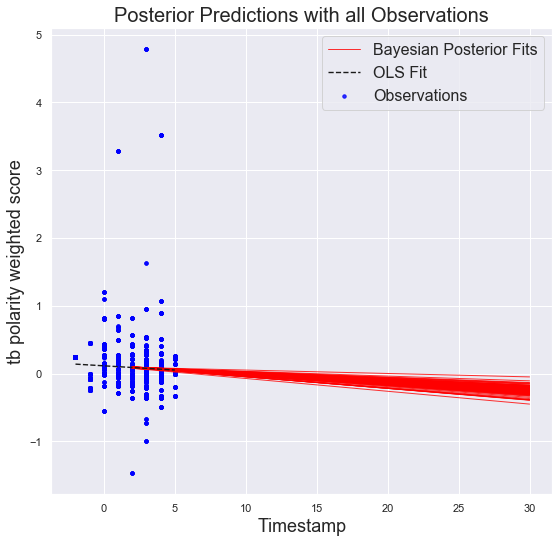

In [79]:
plt.figure(figsize = (8, 8))
pm.plot_posterior_predictive_glm(linear_trace, samples = 100, eval=np.linspace(2, 30, 100), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['Intercept'] + sample['slope'] * x);
plt.scatter(X['Timestamp'], y.values, s = 12, alpha = 0.8, c = 'blue', label = 'Observations')
plt.plot(X['Timestamp'], wf_tb_intercept + X['Timestamp'] * wf_tb_slope, 'k--', label = 'OLS Fit', linewidth = 1.4)
plt.title('Posterior Predictions with all Observations', size = 20); plt.xlabel('Timestamp', size = 18);
plt.ylabel('tb polarity weighted score', size = 18);
plt.legend(prop={'size': 16});

In [ ]:
wf_bayes_prediction_v = linear_trace['Intercept'] + linear_trace['slope'] * timestamp_10_3 

plt.figure(figsize = (8, 8))
plt.style.use('fivethirtyeight')
sns.kdeplot(wf_bayes_prediction_v, label = 'Bayes Posterior Prediction')
plt.vlines(x = wf_vader_intercept + wf_vader_slope * timestamp_10_3, 
           ymin = 0, ymax = 7, 
           label = 'OLS Prediction',
          colors = 'red', linestyles='--')
plt.legend();
plt.xlabel('vader sentiment', size = 18), plt.ylabel('Probability Density', size = 18);
plt.title('Posterior Prediction for 10/3', size = 20);

### 4.2.4 Ordinary Least squares linear regression - with resampling

In [67]:
wf_t_master_df.tb_weighted.describe()

count    4000.000000
mean        0.095421
std         0.338263
min        -1.465909
25%         0.000000
50%         0.036364
75%         0.212121
max         4.785185
Name: tb_weighted, dtype: float64

Intercept from library: 0.1140454096687857
Slope from library: -0.012416428010357137


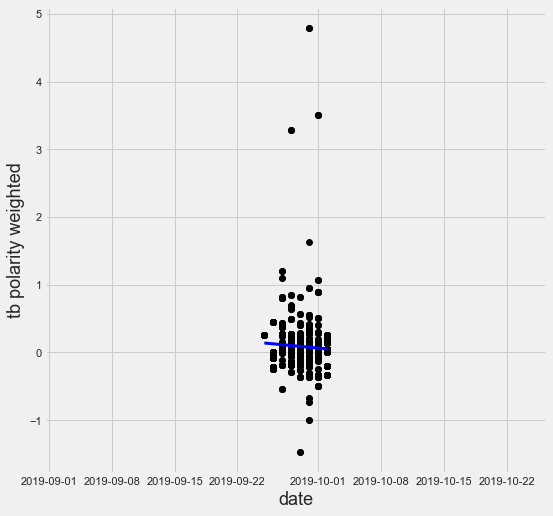

In [68]:
wf_t_master_df['Intercept'] = 1
# Create the features and response
X = wf_t_master_df.loc[:, ['Intercept', 'sourceDate']]
y = wf_t_master_df.loc[:, 'tb_weighted']

wf_announced_date = datetime(2019, 9, 27,0,0,0)  
X['Timestamp'] = X.apply(lambda row: (row.sourceDate - wf_announced_date).days, axis = 1) 

linear_regression = LinearRegression()
linear_regression.fit(np.array(X.Timestamp).reshape(-1,1),y)
y_pred = linear_regression.predict(X.Timestamp.values.astype(float).reshape(-1,1))
# df.time.values.astype(float).reshape(-1, 1)
print('Intercept from library:', linear_regression.intercept_)
print('Slope from library:', linear_regression.coef_[0])
wf_tb_intercept = linear_regression.intercept_
wf_tb_slope =  linear_regression.coef_[0]
# Notes: see 
# 1. https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# 2. https://stackoverflow.com/questions/54352621/sklearn-linear-regression-with-date-data

plt.figure(figsize=(8, 8)) 
plt.scatter(X.sourceDate, y,  color='black')
plt.plot(X.sourceDate, y_pred, color='blue', linewidth=3)
plt.xlabel('date', size = 18); plt.ylabel('tb polarity weighted', size = 18); 
#plt.xticks(())
#plt.yticks(())

plt.show()

### 4.2.5. Bayesian Linear regression - with resampling

In [69]:
# Using all observations (use mu = 0.1, sd = 0.39 from dataframe statistics for tb polarity score)

with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0.1, sd = 0.39)
    
    # Slope 
    slope = pm.Normal('slope', mu = 0.1, sd = 0.39)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 0.39)
    
    # Estimate of mean
    mean = intercept + slope * X.loc[:, 'Timestamp']
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y.values)
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(1000, step)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, slope, Intercept]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 3000/3000 [00:05<00:00, 596.25draws/s]


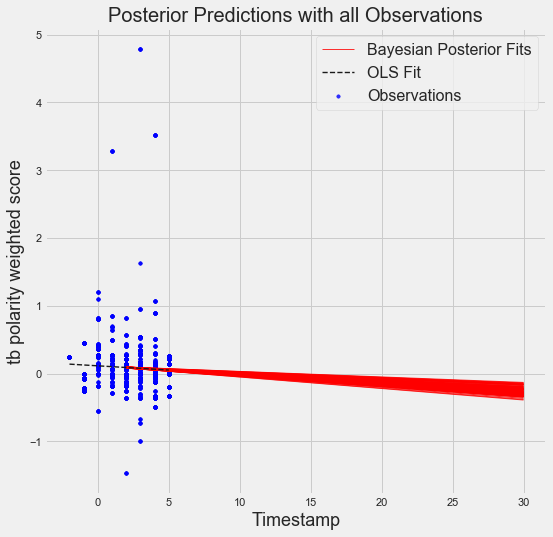

In [70]:
plt.figure(figsize = (8, 8))
pm.plot_posterior_predictive_glm(linear_trace, samples = 100, eval=np.linspace(2, 30, 100), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['Intercept'] + sample['slope'] * x);
plt.scatter(X['Timestamp'], y.values, s = 12, alpha = 0.8, c = 'blue', label = 'Observations')
plt.plot(X['Timestamp'], wf_tb_intercept + X['Timestamp'] * wf_tb_slope, 'k--', label = 'OLS Fit', linewidth = 1.4)
plt.title('Posterior Predictions with all Observations', size = 20); plt.xlabel('Timestamp', size = 18);
plt.ylabel('tb polarity weighted score', size = 18);
plt.legend(prop={'size': 16});

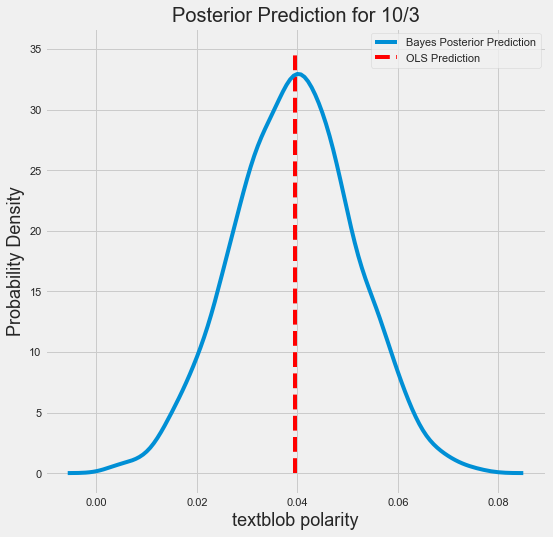

In [73]:
wf_bayes_prediction_tb = linear_trace['Intercept'] + linear_trace['slope'] * timestamp_10_3 

plt.figure(figsize = (8, 8))
plt.style.use('fivethirtyeight')
sns.kdeplot(wf_bayes_prediction_tb, label = 'Bayes Posterior Prediction')
plt.vlines(x = wf_tb_intercept + wf_tb_slope * timestamp_10_3, 
           ymin = 0, ymax = 35, 
           label = 'OLS Prediction',
          colors = 'red', linestyles='--')
plt.legend();
plt.xlabel('textblob polarity', size = 18), plt.ylabel('Probability Density', size = 18);
plt.title('Posterior Prediction for 10/3', size = 20);

## 5. SAP - Compare between dates

### 5.1. Vader Compound

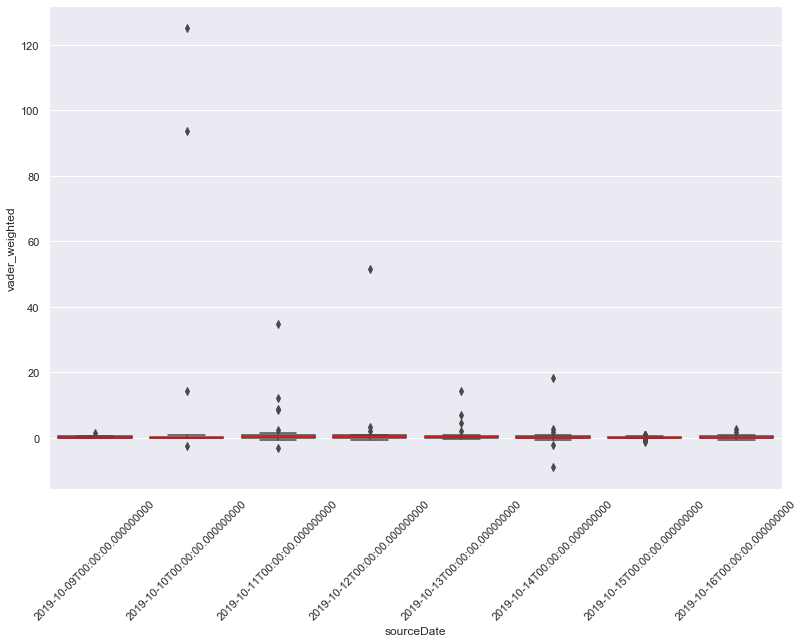

In [82]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Create box plot with Seaborn's default settings
g=sns.boxplot(x='sourceDate', y='vader_weighted', data=sap_twitterDF, medianprops={'color':'red'})


# Label the axes
g=plt.xlabel('sourceDate')
g=plt.ylabel('vader_weighted')  

plt.xticks(rotation=45)
# Show the plot
plt.show()

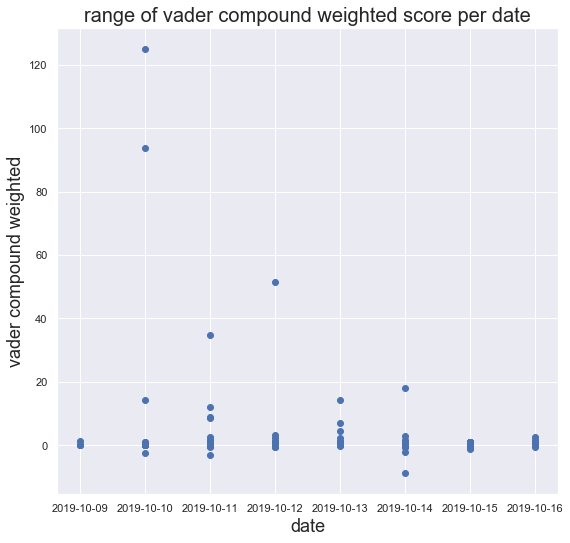

In [83]:
plt.figure(figsize=(8, 8))

plt.plot(sap_twitterDF['sourceDate'], sap_twitterDF['vader_weighted'], 'bo');
plt.xlabel('date', size = 18); plt.ylabel('vader compound weighted', size = 18); 
plt.title('range of vader compound weighted score per date', size = 20);

In [38]:
sap_twitterDF['vader_weighted'].describe()

count    524.000000
mean       0.964346
std        7.463529
min       -8.840000
25%        0.000000
50%        0.000000
75%        0.526700
max      125.031600
Name: vader_weighted, dtype: float64

In [84]:
sap_t_master_df.groupby('sourceDate')['vader_weighted'].mean()

sourceDate
2019-10-09    0.394317
2019-10-10    1.449704
2019-10-11    0.857102
2019-10-12    0.639313
2019-10-13    0.720430
2019-10-14    0.357603
2019-10-15    0.102878
2019-10-16    0.332653
Name: vader_weighted, dtype: float64

In [85]:
sap_t_master_df.groupby('sourceDate')['tb_weighted'].mean()

sourceDate
2019-10-09    0.122727
2019-10-10    0.249206
2019-10-11    0.560439
2019-10-12    0.140200
2019-10-13    0.402771
2019-10-14    0.167180
2019-10-15    0.031475
2019-10-16    0.101595
Name: tb_weighted, dtype: float64

### 5.1.1 Ordinary Least squares linear regression - without resampling


Intercept from library: 0.27201517867449415
Slope from library: -0.016565578568954995


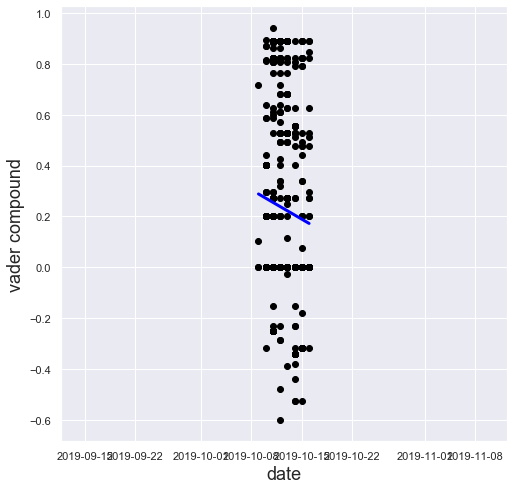

In [39]:
sap_twitterDF['Intercept'] = 1
# Create the features and response
X = sap_twitterDF.loc[:, ['Intercept', 'sourceDate']]
y = sap_twitterDF.loc[:, 'vader_compound']

sap_announced_date = datetime(2019, 10, 10,0,0,0)  

X['Timestamp'] = X.apply(lambda row: (row.sourceDate - sap_announced_date).days, axis = 1) 

linear_regression = LinearRegression()
linear_regression.fit(np.array(X.Timestamp).reshape(-1,1),y)
y_pred = linear_regression.predict(X.Timestamp.values.astype(float).reshape(-1,1))
# df.time.values.astype(float).reshape(-1, 1)
print('Intercept from library:', linear_regression.intercept_)
print('Slope from library:', linear_regression.coef_[0])
sap_vader_intercept = linear_regression.intercept_
sap_vader_slope =  linear_regression.coef_[0]


plt.figure(figsize=(8, 8)) 
plt.scatter(X.sourceDate, y,  color='black')
plt.plot(X.sourceDate, y_pred, color='blue', linewidth=3)
plt.xlabel('date', size = 18); plt.ylabel('vader compound', size = 18); 
#plt.xticks(())
#plt.yticks(())

plt.show()

### 5.1.2. Bayesian Linear regression - without resampling

In [40]:
# Using all observations (use mu=0.96 and sd=7.46 from dataframe statistics for vader compound score)


with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0.96, sd = 7.46)
    
    # Slope 
    slope = pm.Normal('slope', mu = 0.96, sd = 7.46)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 7.46)
    
    # Estimate of mean
    mean = intercept + slope * X.loc[:, 'Timestamp']
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y.values)
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(1000, step)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, slope, Intercept]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 3000/3000 [00:06<00:00, 479.65draws/s]
The acceptance probability does not match the target. It is 0.909329199498006, but should be close to 0.8. Try to increase the number of tuning steps.


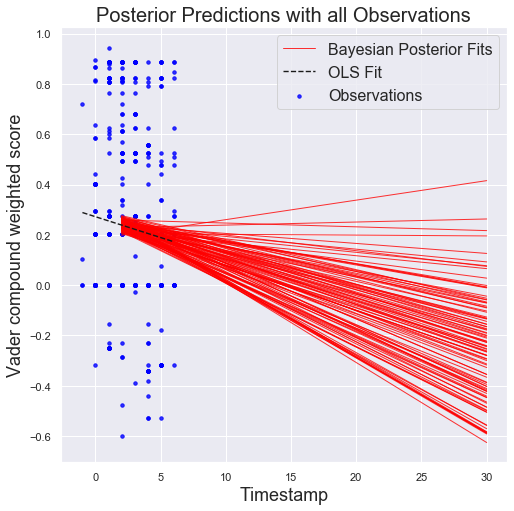

In [41]:
plt.figure(figsize = (8, 8))
pm.plot_posterior_predictive_glm(linear_trace, samples = 100, eval=np.linspace(2, 30, 100), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['Intercept'] + sample['slope'] * x);
plt.scatter(X['Timestamp'], y.values, s = 12, alpha = 0.8, c = 'blue', label = 'Observations')
plt.plot(X['Timestamp'], sap_vader_intercept + X['Timestamp'] * sap_vader_slope, 'k--', label = 'OLS Fit', linewidth = 1.4)
plt.title('Posterior Predictions with all Observations', size = 20); plt.xlabel('Timestamp', size = 18);
plt.ylabel('Vader compound weighted score', size = 18);
plt.legend(prop={'size': 16});

### 5.1.3 Ordinary Least squares linear regression - with resampling

In [87]:
sap_t_master_df.vader_weighted.describe()

count    4000.000000
mean        0.606750
std         4.522286
min        -8.840000
25%         0.000000
50%         0.000000
75%         0.526700
max       125.031600
Name: vader_weighted, dtype: float64

Intercept from library: 0.8622014285714286
Slope from library: -0.10218052142857141


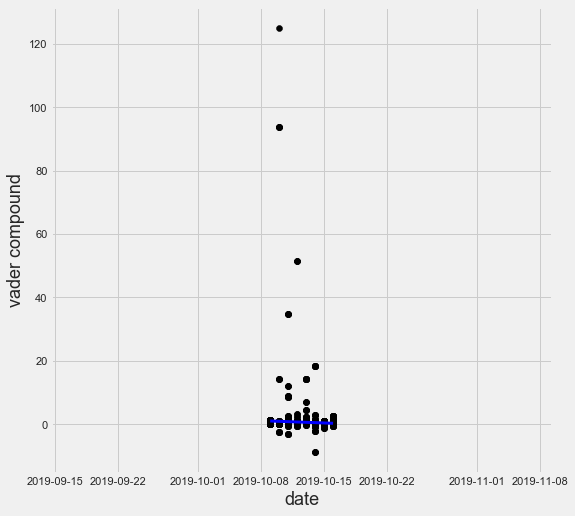

In [88]:
sap_t_master_df['Intercept'] = 1
# Create the features and response
X = sap_t_master_df.loc[:, ['Intercept', 'sourceDate']]
y = sap_t_master_df.loc[:, 'vader_weighted']

sap_announced_date = datetime(2019, 10, 10,0,0,0)  
X['Timestamp'] = X.apply(lambda row: (row.sourceDate - sap_announced_date).days, axis = 1) 

linear_regression = LinearRegression()
linear_regression.fit(np.array(X.Timestamp).reshape(-1,1),y)
y_pred = linear_regression.predict(X.Timestamp.values.astype(float).reshape(-1,1))
# df.time.values.astype(float).reshape(-1, 1)
print('Intercept from library:', linear_regression.intercept_)
print('Slope from library:', linear_regression.coef_[0])
sap_vader_intercept = linear_regression.intercept_
sap_vader_slope =  linear_regression.coef_[0]
# Notes: see 
# 1. https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# 2. https://stackoverflow.com/questions/54352621/sklearn-linear-regression-with-date-data

plt.figure(figsize=(8, 8)) 
plt.scatter(X.sourceDate, y,  color='black')
plt.plot(X.sourceDate, y_pred, color='blue', linewidth=3)
plt.xlabel('date', size = 18); plt.ylabel('vader compound', size = 18); 
#plt.xticks(())
#plt.yticks(())

plt.show()

### 5.1.4. Bayesian Linear regression - with resampling

In [89]:
# Using all observations (use mu=0.61 and sd=4.52 from dataframe statistics for vader compound score)

with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0.61, sd = 4.52)
    
    # Slope 
    slope = pm.Normal('slope', mu = 0.61, sd = 4.52)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 4.52)
    
    # Estimate of mean
    mean = intercept + slope * X.loc[:, 'Timestamp']
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y.values)
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(1000, step)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, slope, Intercept]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 3000/3000 [00:05<00:00, 570.36draws/s]


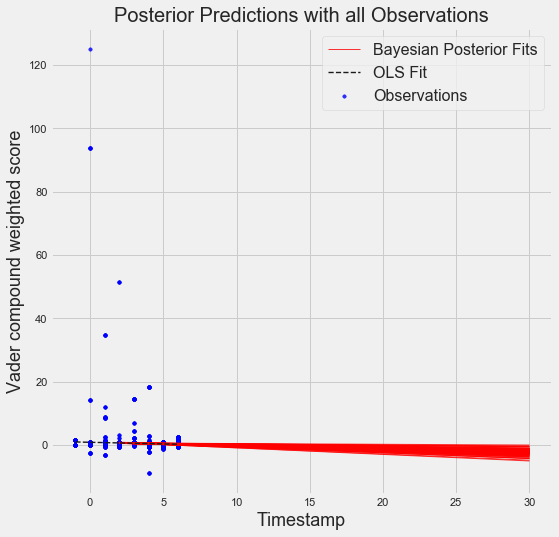

In [90]:
plt.figure(figsize = (8, 8))
pm.plot_posterior_predictive_glm(linear_trace, samples = 100, eval=np.linspace(2, 30, 100), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['Intercept'] + sample['slope'] * x);
plt.scatter(X['Timestamp'], y.values, s = 12, alpha = 0.8, c = 'blue', label = 'Observations')
plt.plot(X['Timestamp'], sap_vader_intercept + X['Timestamp'] * sap_vader_slope, 'k--', label = 'OLS Fit', linewidth = 1.4)
plt.title('Posterior Predictions with all Observations', size = 20); plt.xlabel('Timestamp', size = 18);
plt.ylabel('Vader compound weighted score', size = 18);
plt.legend(prop={'size': 16});

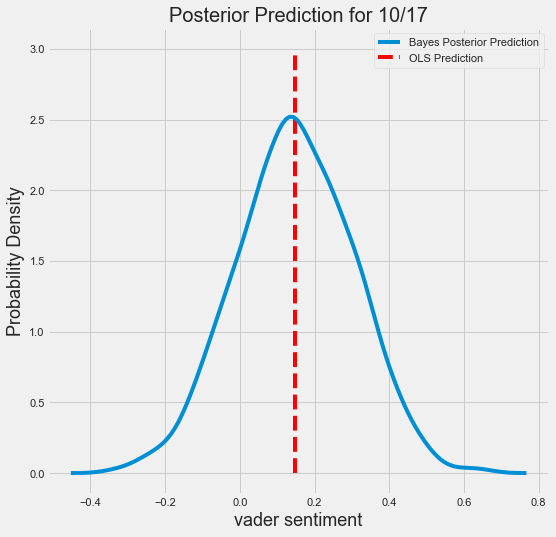

In [95]:
timestamp_10_17 = 7
sap_bayes_prediction_v = linear_trace['Intercept'] + linear_trace['slope'] * timestamp_10_17 

plt.figure(figsize = (8, 8))
plt.style.use('fivethirtyeight')
sns.kdeplot(sap_bayes_prediction_v, label = 'Bayes Posterior Prediction')
plt.vlines(x = sap_vader_intercept + sap_vader_slope * timestamp_10_17, 
           ymin = 0, ymax = 3, 
           label = 'OLS Prediction',
          colors = 'red', linestyles='--')
plt.legend();
plt.xlabel('vader sentiment', size = 18), plt.ylabel('Probability Density', size = 18);
plt.title('Posterior Prediction for 10/17', size = 20);


### 5.2. TextBlob Polarity

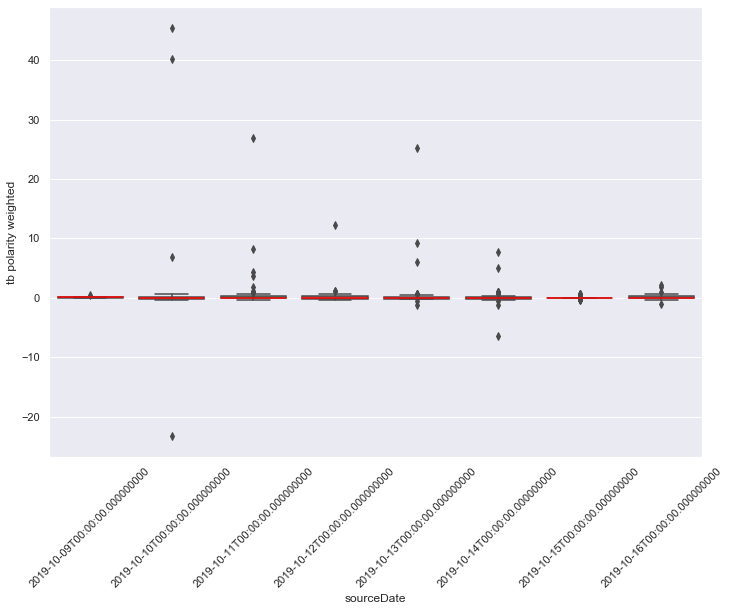

In [46]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Create box plot with Seaborn's default settings
g=sns.boxplot(x='sourceDate', y='tb_weighted', data=sap_twitterDF, medianprops={'color':'red'})


# Label the axes
g=plt.xlabel('sourceDate')
g=plt.ylabel('tb polarity weighted')  

plt.xticks(rotation=45)
# Show the plot
plt.show()

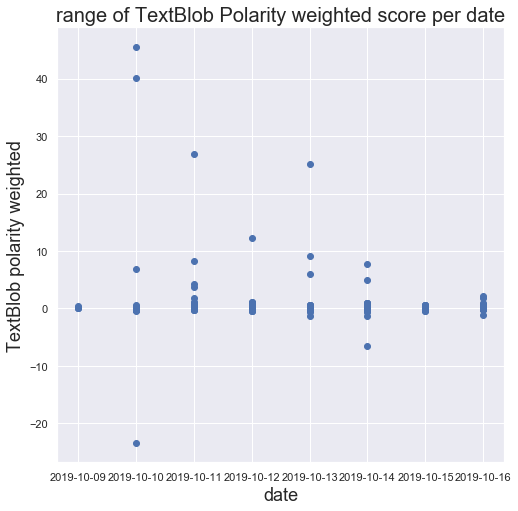

In [47]:
plt.figure(figsize=(8, 8))

plt.plot(sap_twitterDF['sourceDate'], sap_twitterDF['tb_weighted'], 'bo');
plt.xlabel('date', size = 18); plt.ylabel('TextBlob polarity weighted', size = 18); 
plt.title('range of TextBlob Polarity weighted score per date', size = 20);

### 5.2.2 Ordinary Least squares linear regression - without resampling

In [48]:
sap_twitterDF['Intercept'] = 1
# Create the features and response
X = sap_twitterDF.loc[:, ['Intercept', 'sourceDate']]
y = sap_twitterDF.loc[:, 'tb_weighted']

sap_announced_date = datetime(2019, 10, 10,0,0,0)  
X['Timestamp'] = X.apply(lambda row: (row.sourceDate - sap_announced_date).days, axis = 1) 

linear_regression = LinearRegression()
linear_regression.fit(np.array(X.Timestamp).reshape(-1,1),y)
y_pred = linear_regression.predict(X.Timestamp.values.astype(float).reshape(-1,1))
# df.time.values.astype(float).reshape(-1, 1)
print('Intercept from library:', linear_regression.intercept_)
print('Slope from library:', linear_regression.coef_[0])
sap_tb_intercept = linear_regression.intercept_
sap_tb_slope =  linear_regression.coef_[0]

Intercept from library: 0.6427784673653493
Slope from library: -0.10746823518493566


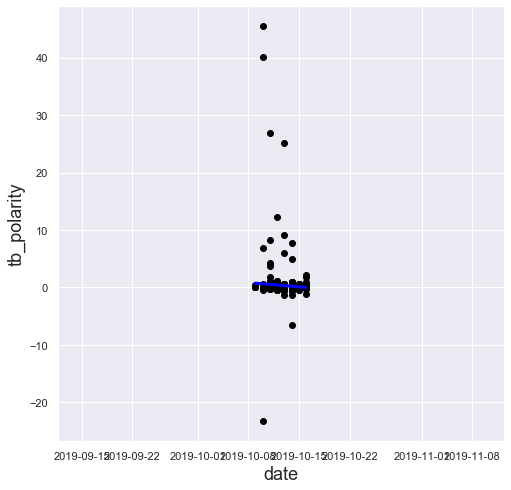

In [49]:
plt.figure(figsize=(8, 8)) 
plt.scatter(X.sourceDate, y,  color='black')
plt.plot(X.sourceDate, y_pred, color='blue', linewidth=3)
plt.xlabel('date', size = 18); plt.ylabel('tb_polarity', size = 18); 
#plt.xticks(())
#plt.yticks(())

plt.show()

### 5.2.3. Bayesian Linear regression - without resampling

In [50]:
sap_twitterDF.tb_weighted.describe()

count    524.000000
mean       0.382722
std        3.414462
min      -23.333333
25%       -0.155556
50%        0.000000
75%        0.172222
max       45.475000
Name: tb_weighted, dtype: float64

In [51]:
# Using all observations (use , mu = 0.38 and sd = 3.41 from dataframe statistics for tb polarity score)

with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0.38, sd = 3.41)
    
    # Slope 
    slope = pm.Normal('slope', mu = 0.38, sd = 3.41)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 3.41)
    
    # Estimate of mean
    mean = intercept + slope * X.loc[:, 'Timestamp']
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y.values)
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(1000, step)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, slope, Intercept]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 3000/3000 [00:04<00:00, 616.63draws/s]


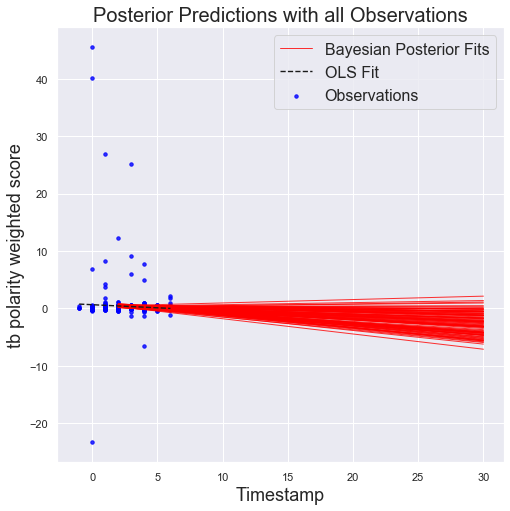

In [52]:
plt.figure(figsize = (8, 8))
pm.plot_posterior_predictive_glm(linear_trace, samples = 100, eval=np.linspace(2, 30, 100), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['Intercept'] + sample['slope'] * x);
plt.scatter(X['Timestamp'], y.values, s = 12, alpha = 0.8, c = 'blue', label = 'Observations')
plt.plot(X['Timestamp'], sap_tb_intercept + X['Timestamp'] * sap_tb_slope, 'k--', label = 'OLS Fit', linewidth = 1.4)
plt.title('Posterior Predictions with all Observations', size = 20); plt.xlabel('Timestamp', size = 18);
plt.ylabel('tb polarity weighted score', size = 18);
plt.legend(prop={'size': 16});

### 5.2.4 Ordinary Least squares linear regression - with resampling

In [53]:
sap_t_master_df.tb_weighted.describe()

count    4000.000000
mean        0.221949
std         2.361471
min       -23.333333
25%        -0.155556
50%         0.000000
75%         0.172222
max        45.475000
Name: tb_weighted, dtype: float64

Intercept from library: 0.28604994378306875
Slope from library: -0.02564037127224627


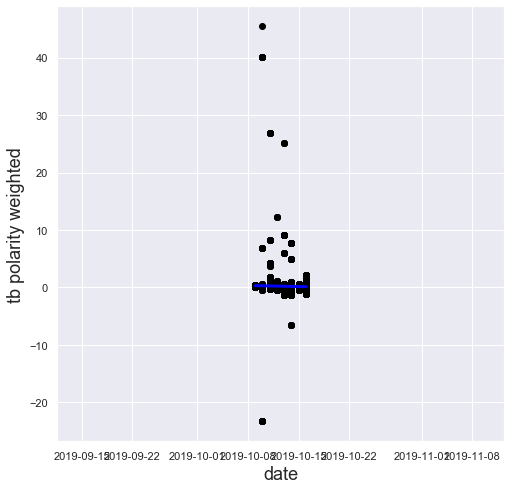

In [54]:
sap_t_master_df['Intercept'] = 1
# Create the features and response
X = sap_t_master_df.loc[:, ['Intercept', 'sourceDate']]
y = sap_t_master_df.loc[:, 'tb_weighted']

sap_announced_date = datetime(2019, 10, 10,0,0,0)  
X['Timestamp'] = X.apply(lambda row: (row.sourceDate - sap_announced_date).days, axis = 1) 

linear_regression = LinearRegression()
linear_regression.fit(np.array(X.Timestamp).reshape(-1,1),y)
y_pred = linear_regression.predict(X.Timestamp.values.astype(float).reshape(-1,1))
# df.time.values.astype(float).reshape(-1, 1)
print('Intercept from library:', linear_regression.intercept_)
print('Slope from library:', linear_regression.coef_[0])
sap_tb_intercept = linear_regression.intercept_
sap_tb_slope =  linear_regression.coef_[0]
# Notes: see 
# 1. https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# 2. https://stackoverflow.com/questions/54352621/sklearn-linear-regression-with-date-data

plt.figure(figsize=(8, 8)) 
plt.scatter(X.sourceDate, y,  color='black')
plt.plot(X.sourceDate, y_pred, color='blue', linewidth=3)
plt.xlabel('date', size = 18); plt.ylabel('tb polarity weighted', size = 18); 
#plt.xticks(())
#plt.yticks(())

plt.show()

### 4.2.5. Bayesian Linear regression - with resampling

In [55]:
# Using all observations (use mu = 0.22, sd = 2.36 from dataframe statistics for tb polarity score)

with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0.22, sd = 2.36)
    
    # Slope 
    slope = pm.Normal('slope', mu = 0.22, sd = 2.36)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 2.36)
    
    # Estimate of mean
    mean = intercept + slope * X.loc[:, 'Timestamp']
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y.values)
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(1000, step)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, slope, Intercept]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 3000/3000 [00:05<00:00, 504.44draws/s]


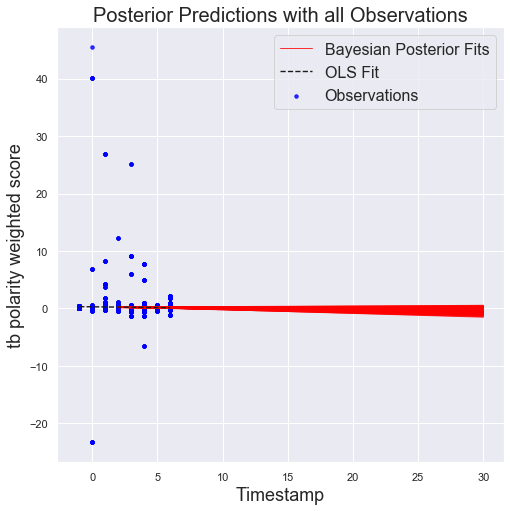

In [56]:
plt.figure(figsize = (8, 8))
pm.plot_posterior_predictive_glm(linear_trace, samples = 100, eval=np.linspace(2, 30, 100), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['Intercept'] + sample['slope'] * x);
plt.scatter(X['Timestamp'], y.values, s = 12, alpha = 0.8, c = 'blue', label = 'Observations')
plt.plot(X['Timestamp'], sap_tb_intercept + X['Timestamp'] * sap_tb_slope, 'k--', label = 'OLS Fit', linewidth = 1.4)
plt.title('Posterior Predictions with all Observations', size = 20); plt.xlabel('Timestamp', size = 18);
plt.ylabel('tb polarity weighted score', size = 18);
plt.legend(prop={'size': 16});

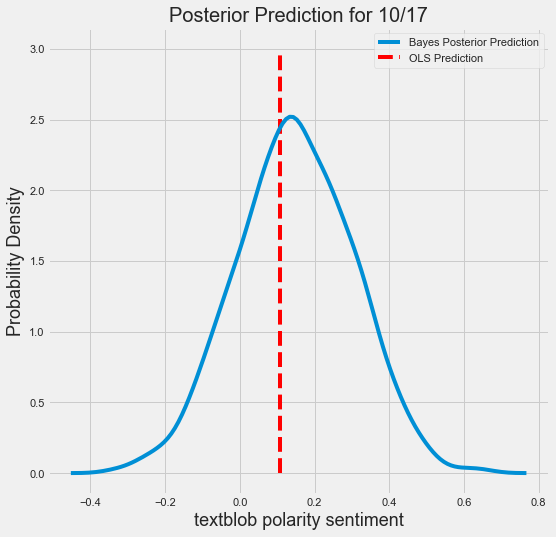

In [96]:
sap_bayes_prediction_tb = linear_trace['Intercept'] + linear_trace['slope'] * timestamp_10_17 

plt.figure(figsize = (8, 8))
plt.style.use('fivethirtyeight')
sns.kdeplot(sap_bayes_prediction_tb, label = 'Bayes Posterior Prediction')
plt.vlines(x = sap_tb_intercept + sap_tb_slope * timestamp_10_17, 
           ymin = 0, ymax = 3, 
           label = 'OLS Prediction',
          colors = 'red', linestyles='--')
plt.legend();
plt.xlabel('textblob polarity sentiment', size = 18), plt.ylabel('Probability Density', size = 18);
plt.title('Posterior Prediction for 10/17', size = 20);